In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./EF_comp.csv')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Project number                                198 non-null    object 
 1   The date                                      198 non-null    object 
 2   Region                                        198 non-null    object 
 3   The town/village                              191 non-null    object 
 4   Home address                                  198 non-null    object 
 5   County/City                                   198 non-null    object 
 6   Initial year of exploitation                  198 non-null    int64  
 7   Building Total Area                           198 non-null    float64
 8   Room volume                                   198 non-null    float64
 9   Average floor height                          198 non-null    flo

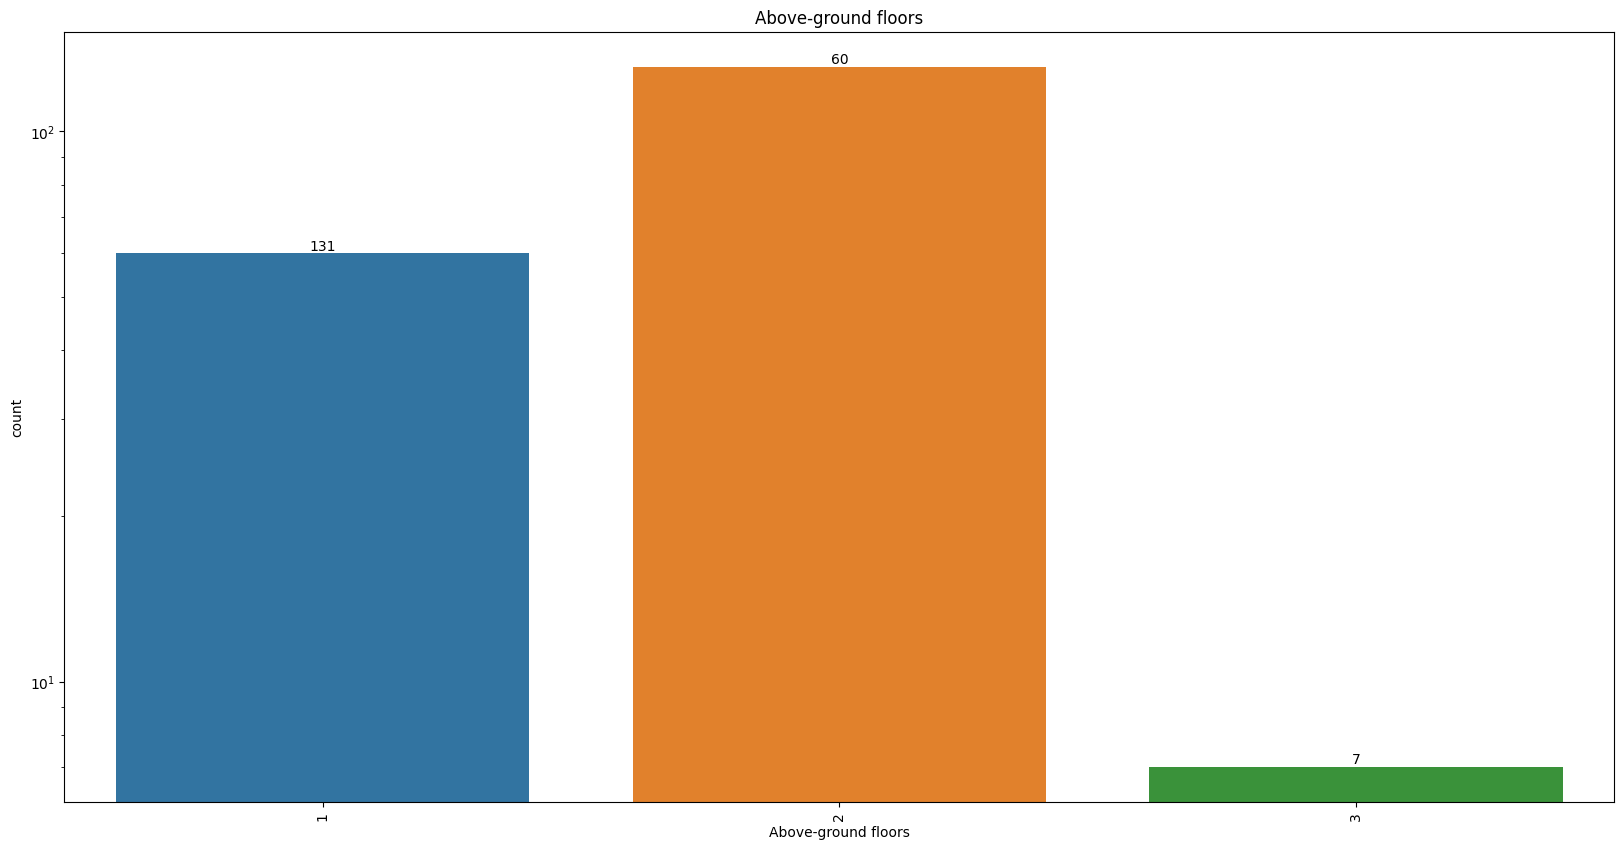

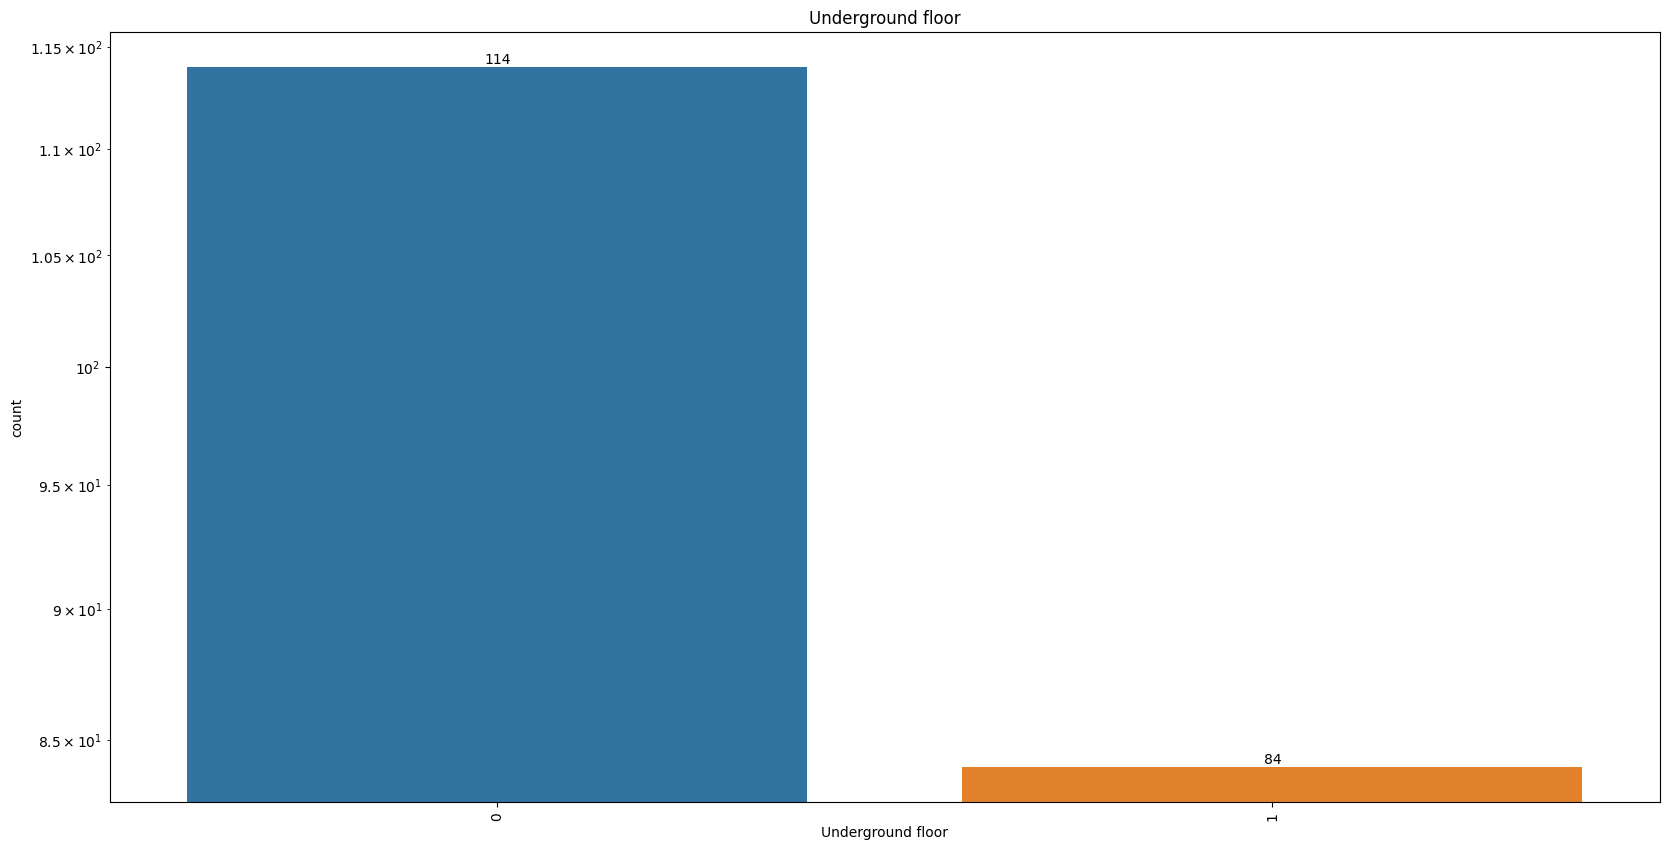

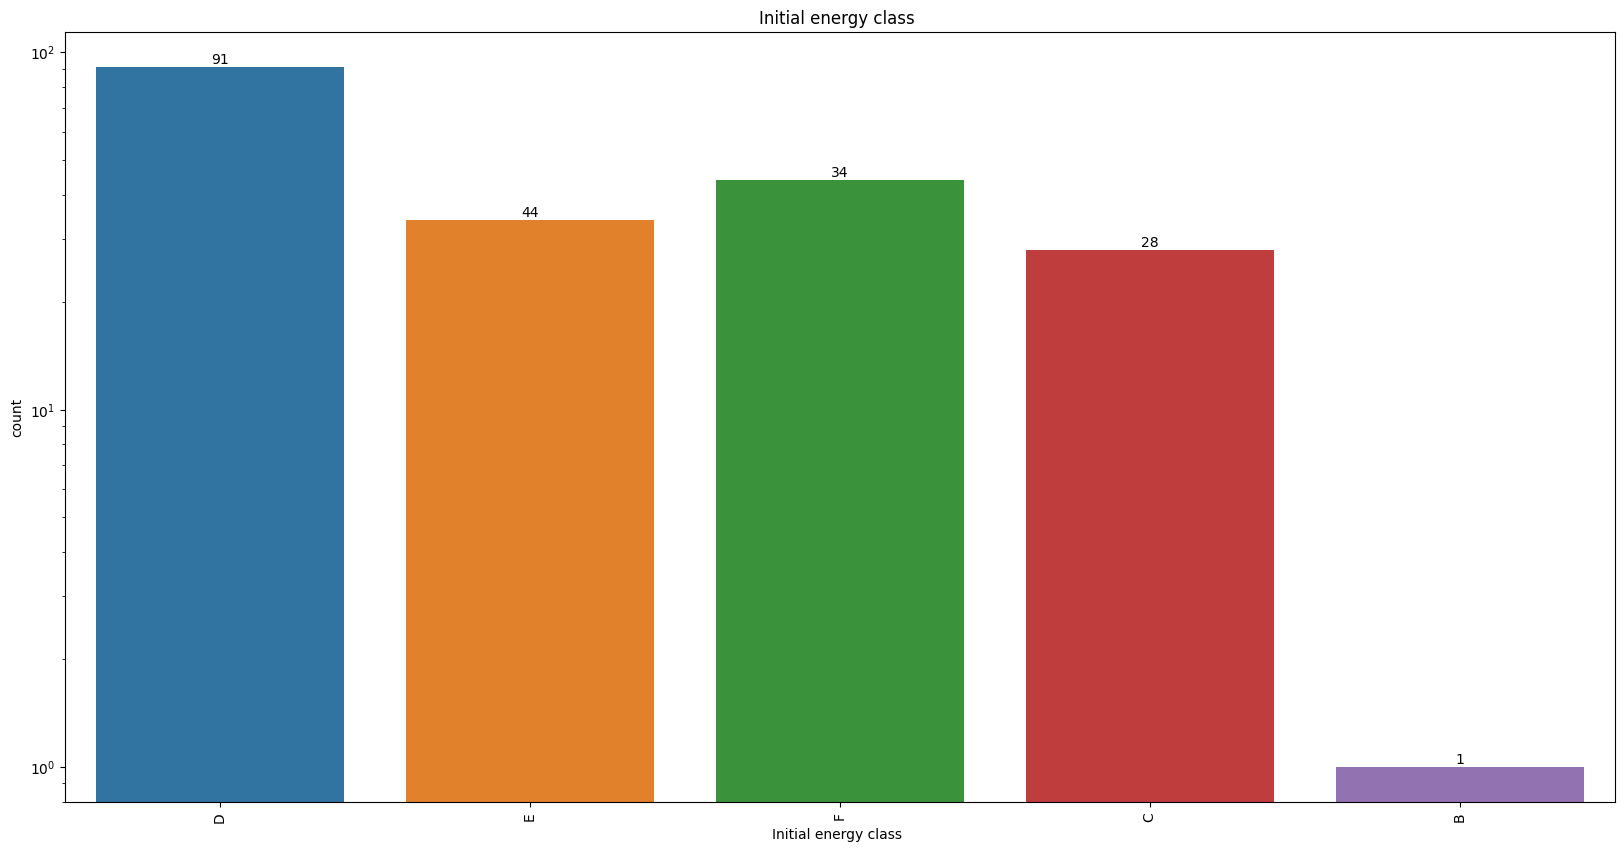

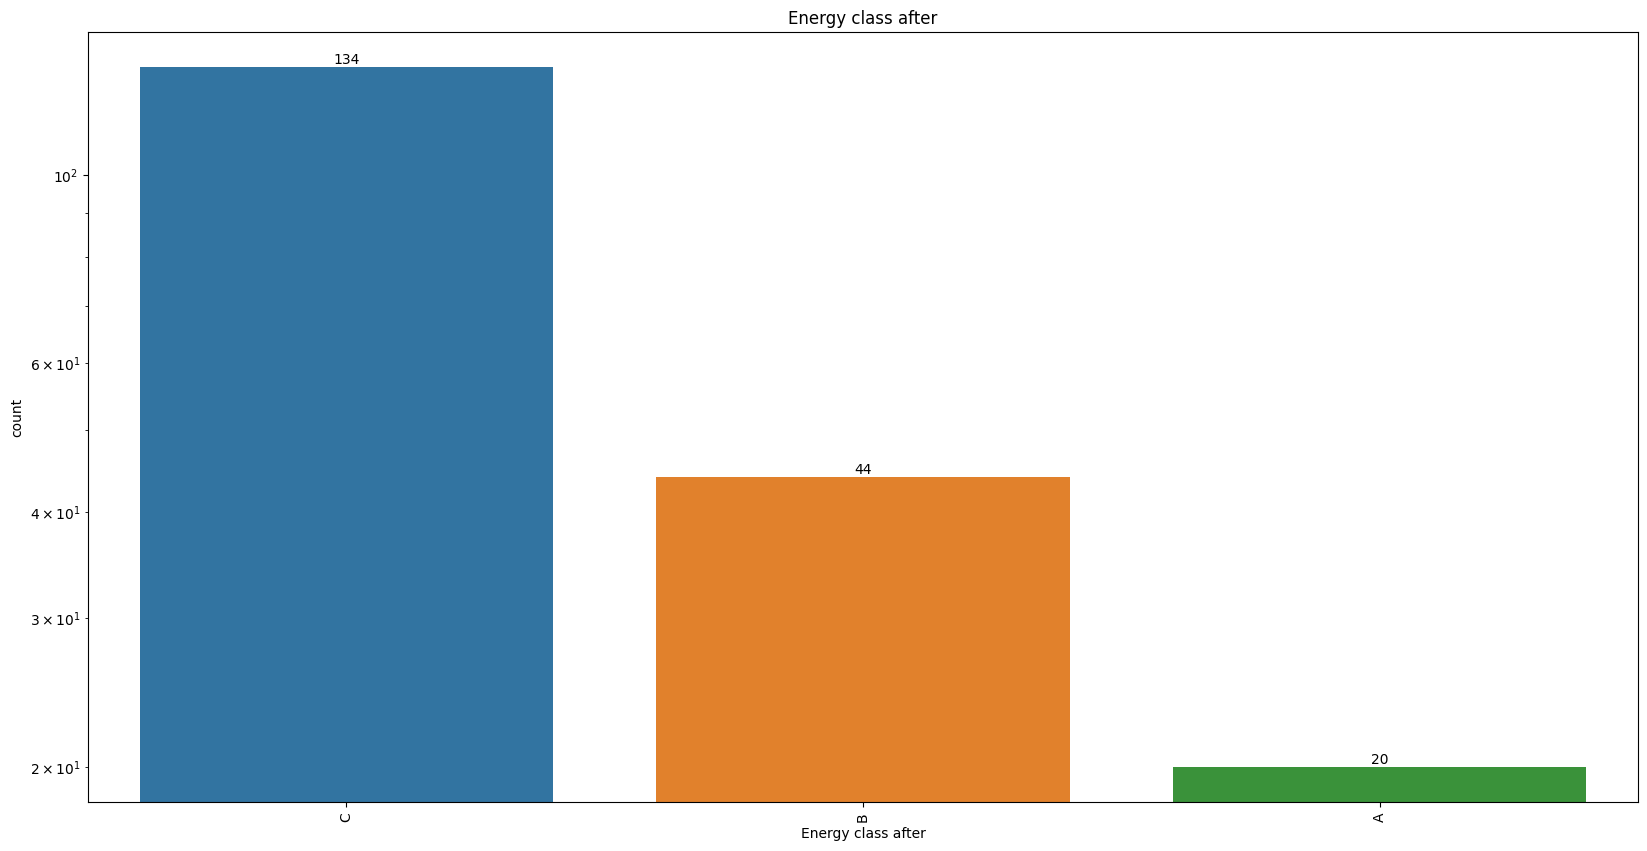

In [8]:
def create_barplots():
    for col in ['Above-ground floors','Underground floor','Initial energy class ','Energy class after']:
        """ 
        This function creates a countplot for each of datetime_parameters we want in the x-axis
        Parameters: None
        ----------
        Returns: None
        -------
        """
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 10)
        ax = sns.countplot(x=df[col])
        ax.set_yscale('log')
        abs_values = df[col].value_counts(ascending=False).values

        ax.bar_label(ax.containers[0], labels=abs_values,rotation=0)
        plt.title(col)
        plt.xticks(x=abs_values, rotation=90)
        plt.show()

create_barplots()

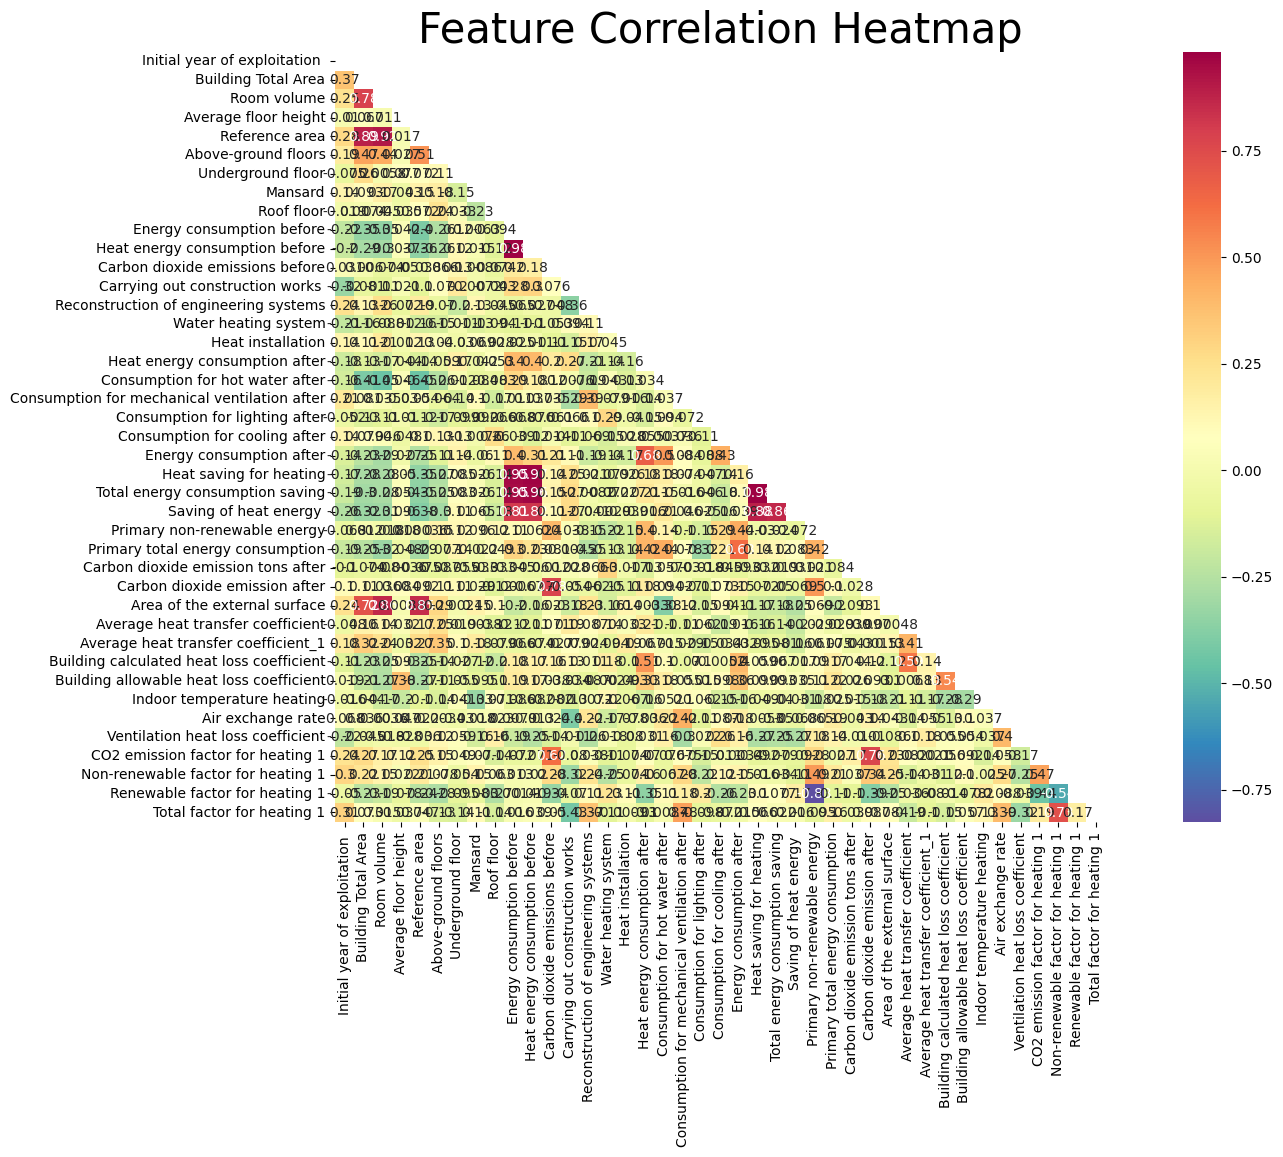

In [15]:
def corr_heatmap(dframe,cluster_labels=None):
    """
    Creates correlation map of dframe between different countries 
    Parameters: 
        dframe: pandas.dataframe of our dataset
        cluster_labels: (optionally) list of labels from hierarchical clustering (see create_dendrogram() below)
    ----------
    Returns: None
    -------
    """

    # Set the threshold for high correlation
    threshold = 0.7
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop features 
    dframe.drop(to_drop, axis=1, inplace=True)


    # Compute the correlation matrix (excluding NA/null values)
    corr = dframe.corr()    
    cmap = 'Spectral_r'
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    res = sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, ax=ax)

    # # size of col names
    # res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 10, rotation = 90)
    # res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 10, rotation = 0); # ";" to supress print in cell

    # # change font size of heatmap colourbar
    # cbar = ax.collections[0].colorbar
    # cbar.ax.tick_params(labelsize=20)
    ax.set_title('Feature Correlation Heatmap',fontsize = 30)

# important_cols = ['Building Total Area','Reference area','Above-ground floors',
#                   'Underground floor','Energy consumption before',
#                   'Initial energy class','Energy class after renovation',
#                   'Carrying out construction works','Reconstruction of engineering systems',
#                   'Heat installation','Water heating system']

# temp_df = df[df.columns[df.columns.isin(important_cols)]]

temp_df = df.copy()
corr_heatmap(temp_df)
plt.show()

#### Heatmap
    We observe the high correlation between following features:
* Electricity consumption of the grid - Electricity consumtion before
* Electricity produced by solar panels - C02 emmitions - Reduction of primary energy Primary energy consumtion after

This leads us to believe that Region is not an important factor in our data + its important to increase solar panel enrgy to reduce C02 emmisions

In [31]:
df1.columns

Index(['Project number', 'Region', 'Granted support',
       'Electricity consumption of the grid',
       'Primary energy consumption before ', 'Current inverter set power',
       'Inverter power in project', 'Electricity produced by solar panels',
       'Primary energy consumption after ', 'Reduction of primary energy',
       'CO2 emissions reduction'],
      dtype='object')

In [35]:
df1.loc[:, ~df1.columns.isin(['Granted support', 'Project Number','Region'])]


,Project number,Electricity consumption of the grid,Primary energy consumption before,Current inverter set power,Inverter power in project,Electricity produced by solar panels,Primary energy consumption after,Reduction of primary energy,CO2 emissions reduction
0,2060,4.65,11.63,0.0,10.0,9.09,-2.01,13.64,0.99
1,1942,8.21,20.53,0.0,8.0,8.21,8.21,12.32,0.89
2,2058,3.52,8.80,0.0,3.0,3.00,4.30,4.50,0.33
3,2035,10.90,27.25,0.0,11.7,10.55,11.43,15.83,1.15
4,2007,14.28,35.70,0.0,10.0,8.70,22.65,13.05,0.95
...,...,...,...,...,...,...,...,...,...
805,29,6.96,17.40,0.0,6.0,6.40,7.80,9.60,0.70
806,21,4.20,10.50,0.0,6.4,5.30,2.55,7.95,0.58
807,24,7.89,19.73,0.0,10.0,12.00,1.73,18.00,1.31
808,32,3.76,9.40,0.0,10.0,10.00,-5.60,15.00,1.09


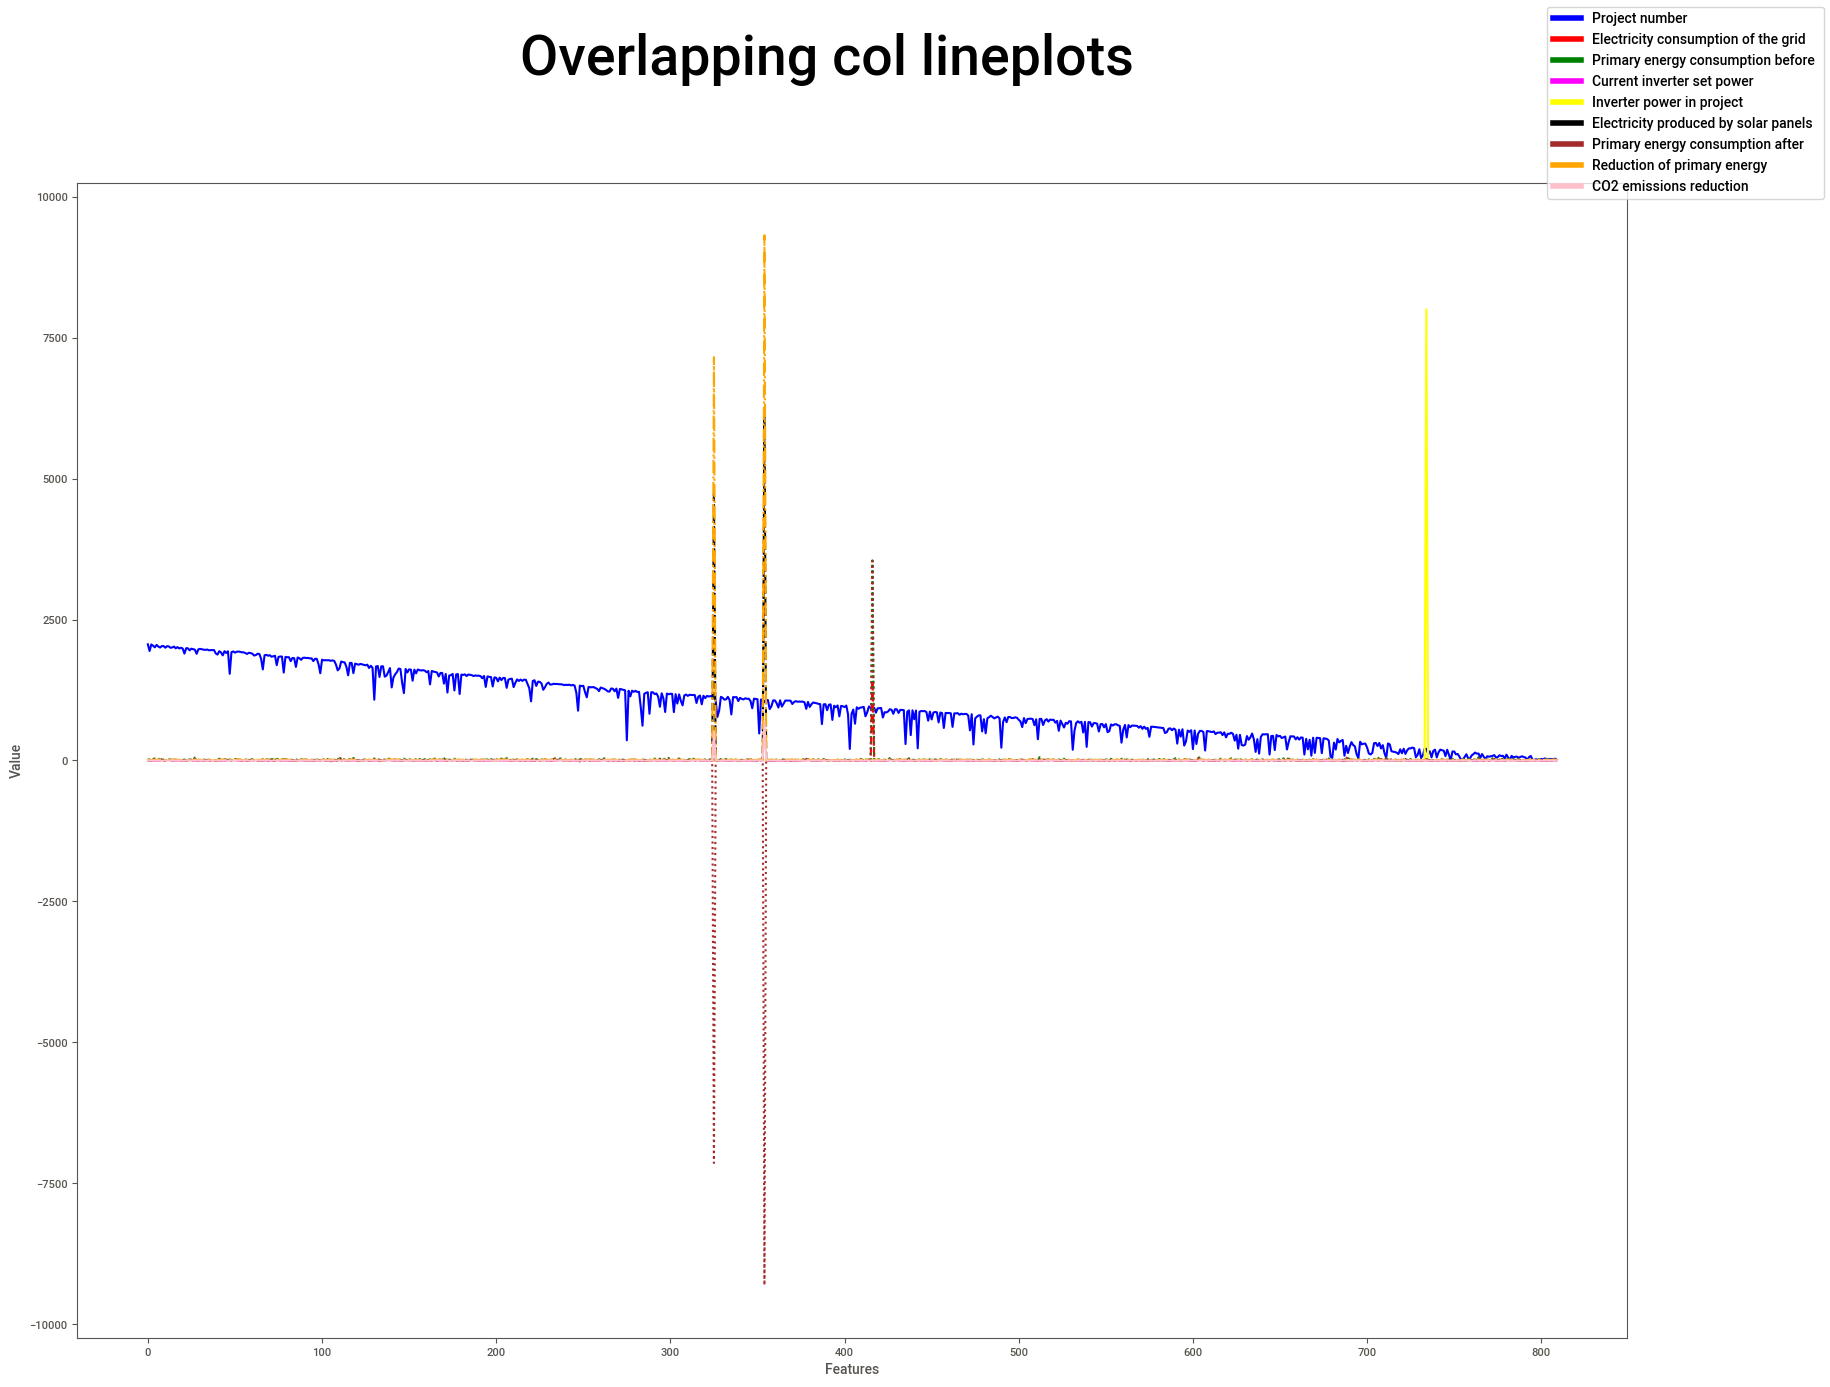

In [36]:
from matplotlib.lines import Line2D
from itertools import cycle

def plot_histograms(dframe):
    ls = ['-','--',':','-.','-','--',':','-.']
    linecycler = cycle(ls) #create an object that can circle around that list

    fig, ax = plt.subplots(figsize=(20,15))
    fig.suptitle('Overlapping col lineplots', fontsize=40)
    fig.subplots_adjust(hspace=0.5) # create space between vertical plots (by axes)

    custom_lines = []
    col_list = []
    colours = ['blue','red','green','magenta','yellow',
            'black','brown','orange','pink','olive',
            'purple','crimson','gold'] # list of colours for plots
    colour_iter = iter(colours) #iterator for list of colours

    dframe_without_na = dframe.dropna()

    for col in dframe.loc[:, ~dframe.columns.isin(['Granted support', 'Project Number','Region'])]:
        cur_colour = next(colour_iter) 
        cur_linestyle = next(linecycler)

        sns.lineplot(data=dframe[col], color=cur_colour, ax=ax, linestyle=cur_linestyle)
        ax.set(xlabel='Features', ylabel='Value')

        # add lines and labels for legend based on those used for lineplot above
        custom_lines.append(Line2D([0], [0], color=cur_colour, lw=4))
        col_list.append(col)

    fig.legend(custom_lines, col_list);
        
plot_histograms(df1)

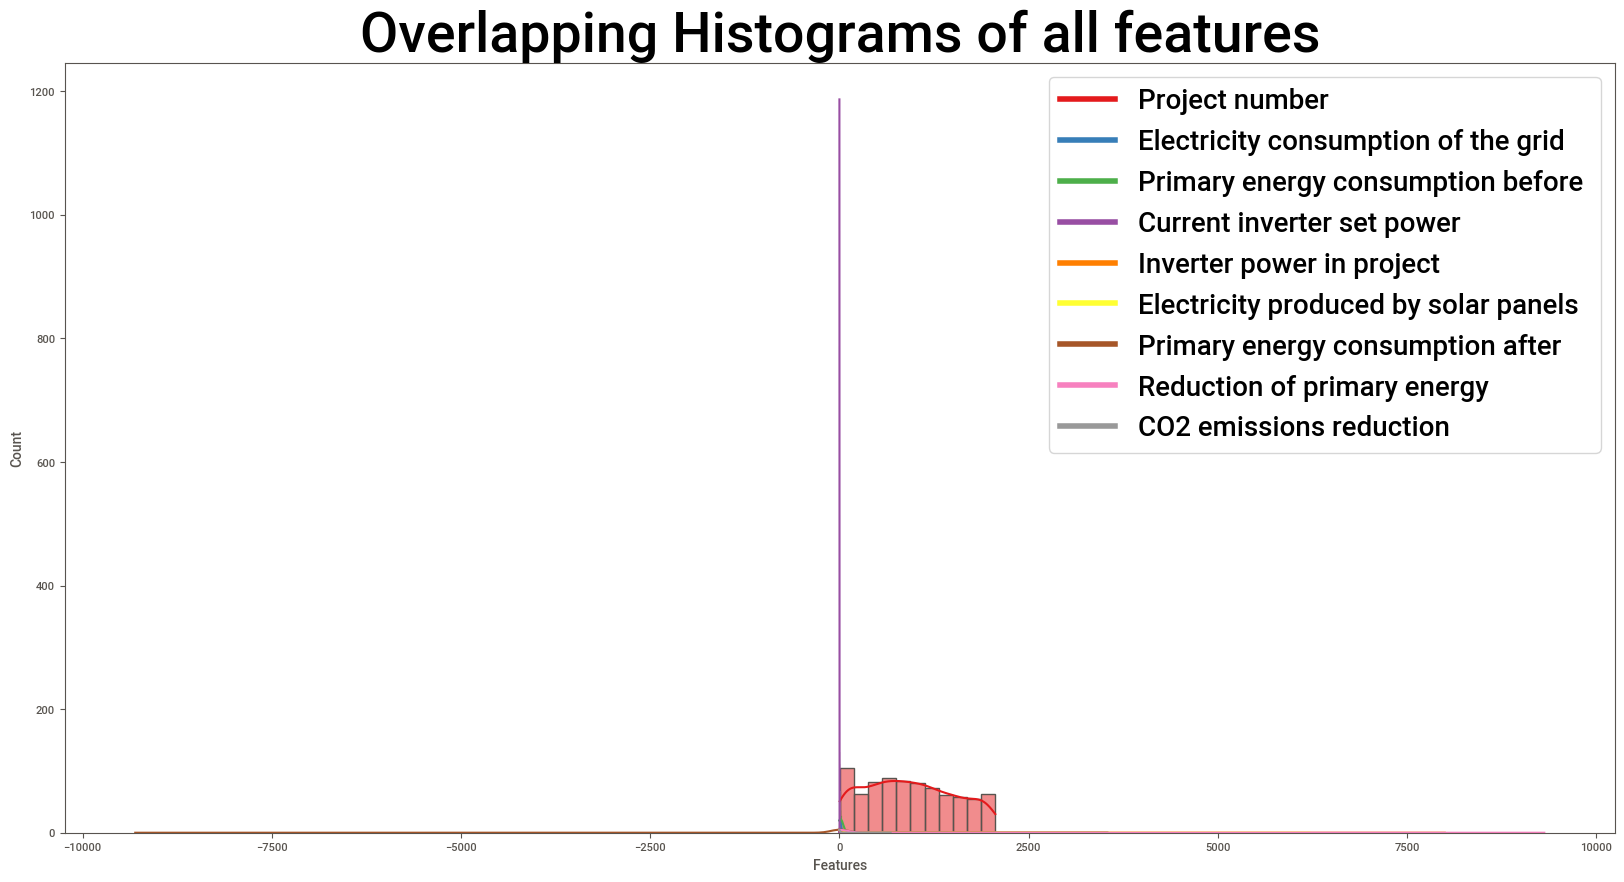

In [43]:
from matplotlib.lines import Line2D
from itertools import cycle

def feature_histograms(dframe):
    """
    In this function, we create overlapping histograms where each histogram is 
    the entirety of our dataset (all countries) for a different year 
    Parameters: None
    ----------
    Returns: None
    -------
    """
    # see code from previous cell for relative explanation of code
    custom_lines = []
    pallete = []
    # ~~~~~~~~~~~~~~~~~~~~~ Colour based on cmap ~~~~~~~~~~~~~~~~~~~~~~~~~~
    cmap = mpl.cm.get_cmap('Set1')    
    for val in np.arange(0, 1, 0.12).tolist(): pallete.append(cmap(val))
    pallete_cycler = cycle(pallete)
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set(xlabel='Features', ylabel='Count')
    plt.title('Overlapping Histograms of all features', fontsize=40)
    # plt.xlim(0, 32000);
    # plt.ylim(0, 13000);

    col_list = dframe.loc[:, ~dframe.columns.isin(['Granted support', 'Project Number',
                                                    'Region', 'Current inverter set power'])]

    for col in col_list:
        cur_colour = next(pallete_cycler)
        sns.histplot(dframe[col], ax=ax, kde=True, color=cur_colour)
        custom_lines.append(Line2D([0], [0], color=cur_colour, lw=4))
    
    ax.legend(custom_lines, col_list, fontsize=20);
    
feature_histograms(df1)

In [1]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

NameError: name 'df' is not defined

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)